In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' # Disables INFO & WARNING logs
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from maptd_model import maptd_model
from tkinter.filedialog import askdirectory

In [2]:
TILE_SIZE = 512
TRAIN_BATCH_SIZE = 16

# Define the model
maptd = maptd_model(input_size=TILE_SIZE)

In [3]:
INITIAL_DIR = 'D:/Gerasimos/Toponym_Recognition/MapTD_General/MapTD_TF2/data/ckpts/models'
ckpts_dir = askdirectory(initialdir=INITIAL_DIR, 
                         title='Select the directory with the checkpoints')

latest = tf.train.latest_checkpoint(ckpts_dir)
print(latest)
ckpt = tf.train.Checkpoint(model=maptd)
ckpt.restore(latest)

D:/Gerasimos/Toponym_Recognition/MapTD_General/MapTD_TF2/data/ckpts/models/0\ckpt-79


In [4]:
img_path = 'D:/Gerasimos/full.tiff'
#img = plt.imread(img_path)[512:1024, 512:1024]
img = np.expand_dims(plt.imread(img_path), axis=0)    #[512:1024, 512:1024], axis=0)
img.shape
#plt.imshow(img)
#plt.show()

(1, 6342, 8052, 3)

In [5]:
f_score, geo_score = maptd(img, training=False)

ValueError: Input 0 of layer "model" is incompatible with the layer: expected shape=(None, 512, 512, 3), found shape=(1, 6342, 8052, 3)

In [30]:
f_score.shape

TensorShape([1, 128, 128, 1])

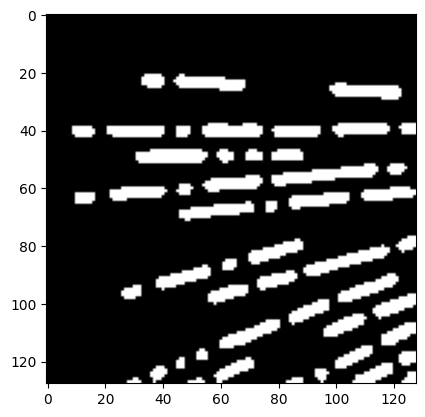

In [62]:
plt.imshow(np.squeeze(np.where(f_score>0.8, 1, 0)), cmap='gray')

In [46]:
np.max(f_score)

0.9999994